In [ ]:
# Importando as bibliotecas necessárias
# Metricas usadas para comparacoes
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# Importando o modelo que sera utilizado
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Plot dos gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Tratamento de dados
import pandas as pd

# Recebendo os dados:
from googledrivedownloader import download_file_from_google_drive as gdd

# Preparando os dados

Iremos aproveitar os dados de diabetes que preparamos anteriormente na aula 2.3 Normalização e Padronização dos Dados.ipynb. Assim, aproveitaremos a Tarefa#1 e a Tarefa #2 dessa aula para receber os dados e fazer uma breve análise exploratória dos mesmos.

## Tarefa #1: Recebendo os dados

In [ ]:
# Recebendo os dados:
data_google_id = '1Jjf3OnYm12rgABJe9dsMs5m_Xz5HNaSl'
gdd(file_id=data_google_id,
    dest_path = './dados.csv', # Faz o download dos dados e salva o mesmo num arquivo nomeado data.csv
    showsize = True,
    overwrite = True)

# Armazenandos os dados em um DataFrame
# para receber os dados o sep teve como argumento o valor ','. Isso ocorreu devido a
diabetes = pd.read_csv("dados.csv", sep = ',')

32.0 KiB Done.


## Tarefa #2: Analise Exploratória dos Dados

Vamos ver informações gerais dos nossos dados:

In [ ]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   insu    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [ ]:
diabetes.shape

(768, 9)

In [ ]:
diabetes.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [ ]:
diabetes.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Podemos observar uma diferença significativa na escala dos dados quando comparamos a coluna `pedi` com a coluna `insu`. Um modelo de Aprendizado de Máquina **pode** se tornar tendencioso se essa diferença de escala continuar nos dados. Por isso, iremos ver os conceitos da **Normalização e Padronização dos Dados**

Antes disso, vamos explorar um pouco os dados fazendo um histrograma de todas as colunas numéricas e a contagem dos valores da coluna `class` do nosso conjunto de dados:

<Axes: xlabel='mass', ylabel='Count'>

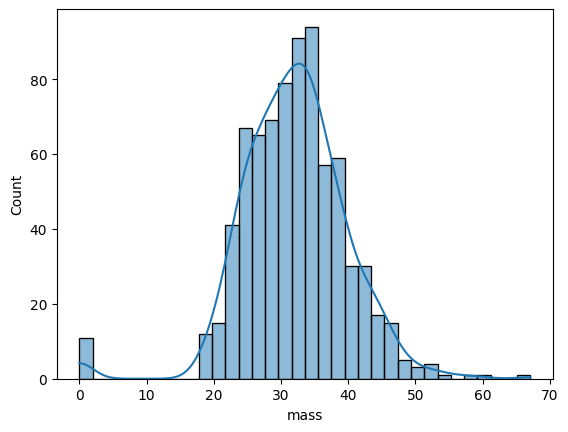

In [ ]:
sns.histplot(x=diabetes["mass"], kde= True)

array([[<Axes: title={'center': 'preg'}>,
        <Axes: title={'center': 'plas'}>,
        <Axes: title={'center': 'pres'}>],
       [<Axes: title={'center': 'skin'}>,
        <Axes: title={'center': 'insu'}>,
        <Axes: title={'center': 'mass'}>],
       [<Axes: title={'center': 'pedi'}>,
        <Axes: title={'center': 'age'}>, <Axes: >]], dtype=object)

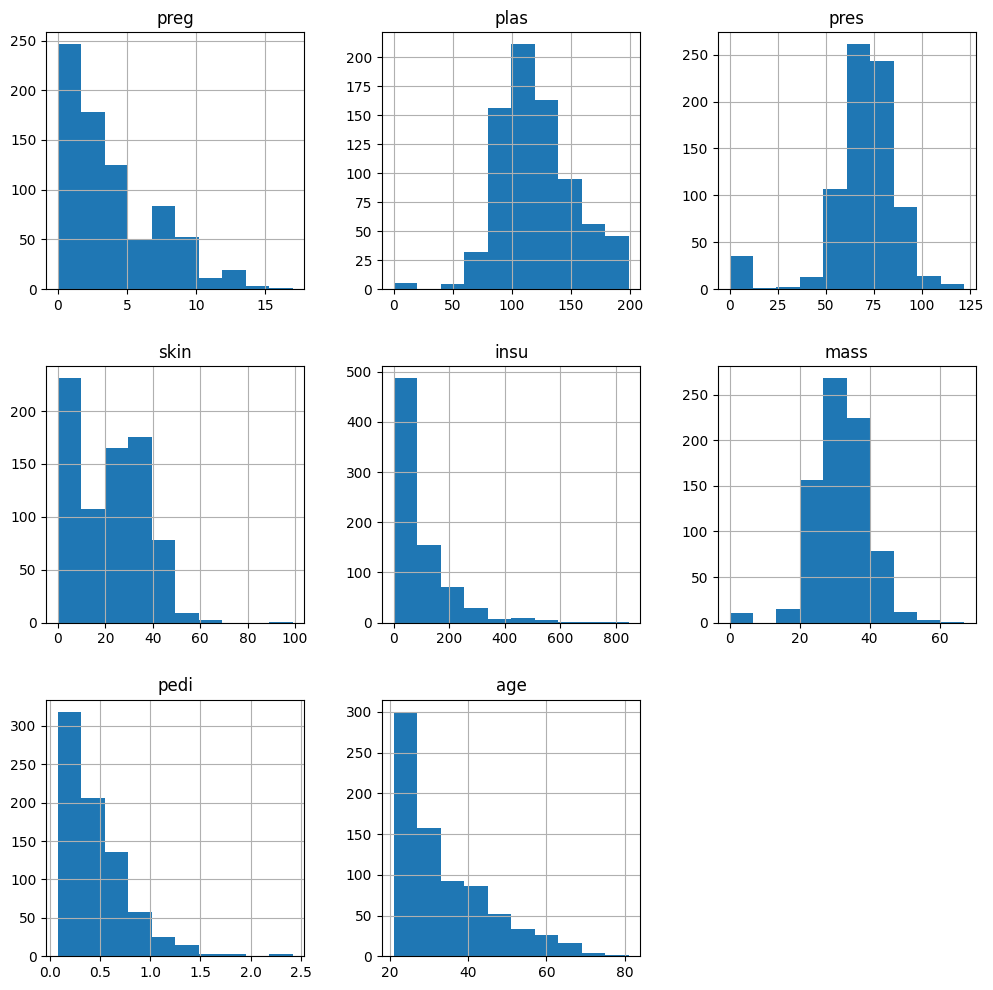

In [ ]:
diabetes.hist(figsize=(12,12))

<Axes: xlabel='class', ylabel='count'>

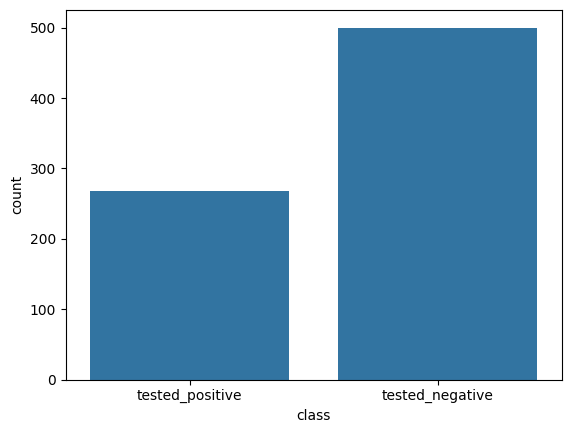

In [ ]:
sns.countplot(data=diabetes, x = 'class')

# Aplicando IA aos nossos dados

Após a análise exploratória dos nossos dados podemos iniciar a aplicação de um algoritmo de machine learning para aprendermos as relações das entradas com a saída do problema que estamos estudando.

In [ ]:
# Divisão do conjunto de dados:
X = diabetes.drop(columns=['class']) # Recursos/Entrada
y = diabetes['class'] # Rótulos/Saída
# Divisão dos dados em cj. de treinamento e teste:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)
# Aplicando a normalização nos dados:
scaler = MinMaxScaler()
scaler.fit(X_train)
# Mudando a escala dos dados:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Vamos começar separando as entradas/recursos `X` da saída/rótulo `y`, dividindo os dados em conjunto de treinamento e teste e ajustar as escalas dos nossos dados:

## Criando o modelo de regressão logistica

In [ ]:
# Instânciando um objeto de Regressão Logística:
rl = LogisticRegression()
rl.fit(X_train_scaled, y_train)
# Fazendo previsões com o modelo
y_pred_rl = rl.predict(X_test_scaled)

In [ ]:
y_pred_rl[:20]

array(['tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_positive',
       'tested_positive', 'tested_negative', 'tested_positive',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_negative',
       'tested_positive', 'tested_negative'], dtype=object)

In [ ]:
y_test[:20]

,class
668,tested_negative
324,tested_negative
624,tested_negative
690,tested_negative
473,tested_negative
204,tested_negative
97,tested_negative
336,tested_negative
568,tested_negative
148,tested_negative


In [ ]:
tabela=pd.DataFrame({'y_rl' : y_pred_rl,
                     'y_test' : y_test})
tabela.head()

,y_rl,y_test
668,tested_negative,tested_negative
324,tested_negative,tested_negative
624,tested_negative,tested_negative
690,tested_negative,tested_negative
473,tested_negative,tested_negative


In [ ]:
mask = tabela['y_rl'] == tabela['y_test']
mask.sum()

np.int64(172)

In [ ]:
172/231

0.7445887445887446

In [ ]:
accuracy_score(y_true=y_test,
               y_pred=y_pred_rl)

0.7445887445887446

## Criando o modelo k-NN

In [ ]:
# Instânciando um objeto de k-NN
knn_clf = KNeighborsClassifier(n_neighbors=15)
knn_clf.fit(X_train_scaled, y_train)
# Fazendo as previsões:
y_pred_knn = knn_clf.predict(X_test_scaled)

In [ ]:
accuracy_score(y_true=y_test,
               y_pred=y_pred_knn)

0.7229437229437229

Os dois modelos obtiveram desempenhos próximos de acurácia. Se fossemos escolher apenas analisando essa métrica escolheriamos a Regressão Logística por possuir a melhor métrica de desempenho.

Nosso próximo assunto será abordar outras métricas de desempenho que podem ser levadas em consideração na escolha do melhor modelo.

## Métricas de Desempenho

In [ ]:
tabela=pd.DataFrame({'y_rl' : y_pred_rl,
                     'y_test' : y_test})
tabela

,y_rl,y_test
668,tested_negative,tested_negative
324,tested_negative,tested_negative
624,tested_negative,tested_negative
690,tested_negative,tested_negative
473,tested_negative,tested_negative
...,...,...
619,tested_negative,tested_positive
198,tested_negative,tested_positive
538,tested_negative,tested_negative
329,tested_negative,tested_negative


In [ ]:
diabetes['class'].unique()

array(['tested_positive', 'tested_negative'], dtype=object)

In [ ]:
tp=(tabela['y_rl']==tabela['y_test']) & (tabela['y_rl']=='tested_positive')
tp.sum()

np.int64(45)

In [ ]:
fp=(tabela['y_rl']!=tabela['y_test']) & (tabela['y_rl']=='tested_positive')
fp.sum()

np.int64(24)

In [ ]:
fn=(tabela['y_rl']!=tabela['y_test']) & (tabela['y_rl']=='tested_negative')
fn.sum()

np.int64(35)

In [ ]:
tn=(tabela['y_rl']==tabela['y_test']) & (tabela['y_rl']=='tested_negative')
tn.sum()

np.int64(127)

### Analisando o modelo da **regressão logistica**:

Vamos agora fazer a matriz de confusão para analisar o nosso resultado. Para isso, vamos usar a função `confusion_matrix`. Ela precisa dos seguintes argumentos:

* Dados de saída/rótulo do conjunto de teste (`y_test`);
* Dados de saída/rótulo previstos pelo modelo (`y_pred`);
* Rótulos usados na coluna de saída do modelo (no nosso exemplo: `['tested_positive','tested_negative']`)

In [ ]:
y_test.unique()

array(['tested_negative', 'tested_positive'], dtype=object)

In [ ]:
cm = confusion_matrix(y_true=y_test,
                      y_pred=y_pred_rl,
                      labels=['tested_negative',
                              'tested_positive'
                              ])
cm

array([[127,  24],
       [ 35,  45]])

Para apresentramos a nossa matriz de confusão em forma de uma figura podemos usar a função `ConfusionMatrixDisplay`. Essa função precisa dos seguintes argumentos:
* `confusion_matrix`: A matriz de confusão obtida pela função `confusion_matrix`
* `display_labels`: Os rótulos que você deseja que apareçam na imagem

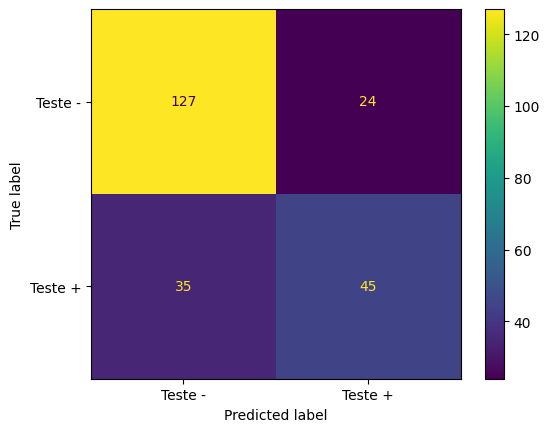

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Teste -',
                                              'Teste +'])
disp.plot()

Começando com a precisão:

$precisao = \frac{TP}{TP+FP}$

In [ ]:
# Testou Positivo
precision_score(y_true=y_test,
                y_pred=y_pred_rl,
                pos_label='tested_positive')

0.6521739130434783

In [ ]:
# Testou Negativo
precision_score(y_true=y_test,
                y_pred=y_pred_rl,
                pos_label='tested_negative')

0.7839506172839507

Calculando a revocação:

$revocacao = \frac{TP}{TP+FN}$

In [ ]:
# Testou Positivo
recall_score(y_true=y_test,
             y_pred=y_pred_rl,
             pos_label='tested_positive')

0.5625

In [ ]:
# Testou Negativo
recall_score(y_true=y_test,
             y_pred=y_pred_rl,
             pos_label='tested_negative')

0.8410596026490066

Calculando o f1 score:

$F_{1} = 2\times\frac{precisao \times revocacao}{precisao + revocacao}$

In [ ]:
# Testou Positivo
f1_score(y_true=y_test,
         y_pred=y_pred_rl,
         pos_label='tested_positive')

0.6040268456375839

In [ ]:
# Testou Negativo
f1_score(y_true=y_test,
         y_pred=y_pred_rl,
         pos_label='tested_negative')

0.8115015974440895

Calculando a acurácia:

$acuracia = \frac{TP+TN}{TP+TN+FP+FN}$

### Analisando o modelo de **k-NN**:

Começando com a precisão:

$precisao = \frac{TP}{TP+FP}$

Calculando a revocação:

$revocacao = \frac{TP}{TP+FN}$

Calculando o f1 score:

$F_{1} = 2\times\frac{precisao \times revocacao}{precisao + revocacao}$

Calculando a acurácia:

$acuracia = \frac{TP+TN}{TP+TN+FP+FN}$

## Comparando os modelos com a curva ROC

In [ ]:
mask_1 = dados['% teste +']>=0.6
mask_2 = dados['% teste +']<0.6
dados[mask_1]['y_pred 60%'] = 'tested_positive'
dados[mask_2]['y_pred 60%'] = 'tested_negative'

NameError: name 'dados' is not defined

In [ ]:
dados.head()

NameError: name 'dados' is not defined

In [ ]:
y_rl_prob = rl.predict_proba(X_test_scaled)
roc_auc_rl = roc_auc_score(y_true=y_test,
                           y_score=y_rl_prob[:,1])
roc_auc_rl

np.float64(0.796274834437086)

In [ ]:
y_knn_prob = knn_clf.predict_proba(X_test_scaled)
roc_auc_knn = roc_auc_score(y_true=y_test,
                           y_score=y_knn_prob[:,1])
roc_auc_knn

np.float64(0.7732201986754966)

In [ ]:
fpr_rl, tpr_rl, _ = roc_curve(y_true=y_test,
                           y_score=y_rl_prob[:,1],
                              pos_label='tested_positive')

In [ ]:
fpr_rl

array([0.        , 0.        , 0.01324503, 0.01324503, 0.01986755,
       0.01986755, 0.02649007, 0.02649007, 0.03311258, 0.03311258,
       0.04635762, 0.04635762, 0.05298013, 0.05298013, 0.05960265,
       0.05960265, 0.06622517, 0.06622517, 0.07284768, 0.07284768,
       0.08609272, 0.08609272, 0.09271523, 0.09271523, 0.10596026,
       0.10596026, 0.11258278, 0.11258278, 0.16556291, 0.16556291,
       0.20529801, 0.20529801, 0.21192053, 0.21192053, 0.2384106 ,
       0.2384106 , 0.2781457 , 0.2781457 , 0.29139073, 0.29139073,
       0.31125828, 0.31125828, 0.33112583, 0.33112583, 0.33774834,
       0.33774834, 0.35099338, 0.35099338, 0.35761589, 0.35761589,
       0.37086093, 0.37086093, 0.39072848, 0.39072848, 0.41721854,
       0.41721854, 0.44370861, 0.44370861, 0.45033113, 0.45033113,
       0.48344371, 0.48344371, 0.50993377, 0.50993377, 0.52317881,
       0.52317881, 0.57615894, 0.57615894, 0.60264901, 0.60264901,
       0.60927152, 0.60927152, 0.64900662, 0.64900662, 0.85430

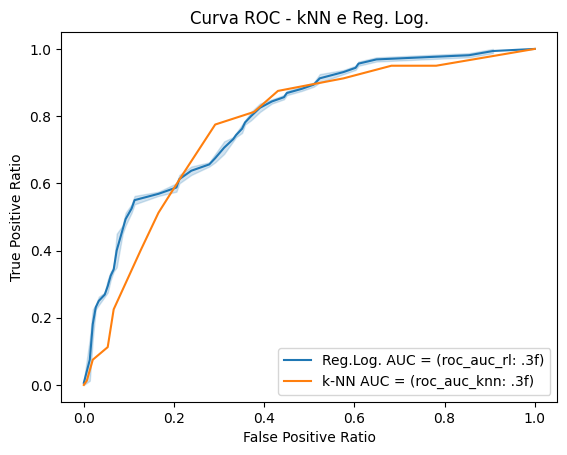

In [ ]:
fpr_rl, tp_rl, _ = roc_curve(y_true=y_test,
                           y_score=y_rl_prob[:,1],
                              pos_label='tested_positive')
fpr_knn, tpr_knn, _ = roc_curve(y_true=y_test,
                           y_score=y_knn_prob[:,1],
                              pos_label='tested_positive')
sns.lineplot(x=fpr_rl,y=tpr_rl,label=f'Reg.Log. AUC = (roc_auc_rl: .3f)')
sns.lineplot(x=fpr_knn,y=tpr_knn,label=f'k-NN AUC = (roc_auc_knn: .3f)')
plt.xlabel("False Positive Ratio")
plt.ylabel("True Positive Ratio")
plt.title("Curva ROC - kNN e Reg. Log.")
plt.legend()
plt.show()